### Question: When the original data are drawn from a normal distribution with a standard deviation of 10, the map stress roughly leveled out after the standard deviation of the added noise alse reached 10
- was this a coincindence? I will test map stress at different noise levels, with the ground truth dataset drawn from distributions with different standard deviations

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import time
from pymds import DistanceMatrix

In [26]:
from numpy.random import uniform, normal, seed
from scipy.spatial.distance import pdist, squareform

import seaborn as sns
sns.set_style('whitegrid')

# 50 random 2D samples
seed(1234)
samples = normal(loc=0, scale=10 ,size=(50,2))
samples2 = normal(loc=0, scale=40 ,size=(50,2))
samples3 = normal(loc=0, scale=100 ,size=(50,2))


# Measure pairwise distances between samples
dists = squareform(pdist(samples))
dists2 = squareform(pdist(samples2))
dists3 = squareform(pdist(samples3))

At an original SD of 10:

In [28]:
# time how long this takes to run
time_start = time.time()

# add more points by taking more increments
stresses = []

for i in np.arange(0,20,0.0125):
    
    nt = normal(loc=0, scale=i ,size=(50,2))
    
    ntdists = squareform(pdist(nt))

    # now to add noise
    ntdists_orig= dists + ntdists
    
    # embed
    emb = DistanceMatrix(ntdists_orig).optimize()
    
    # get map stress
    stresses.append(emb.stress)

print('MDS done! Time elapsed: {} seconds'.format(time.time()-time_start))

MDS done! Time elapsed: 76.21826076507568 seconds


At an original SD of 40:

In [27]:
# time how long this takes to run
time_start = time.time()

# add more points by taking more increments
stresses2 = []

for i in np.arange(0,80,0.05):
    
    nt = normal(loc=0, scale=i ,size=(50,2))
    
    ntdists = squareform(pdist(nt))

    # now to add noise
    ntdists_orig= dists2 + ntdists
    
    # embed
    emb = DistanceMatrix(ntdists_orig).optimize()
    
    # get map stress
    stresses2.append(emb.stress)

print('MDS done! Time elapsed: {} seconds'.format(time.time()-time_start))

MDS done! Time elapsed: 76.17498111724854 seconds


At an original SD of 100:

In [29]:
# time how long this takes to run
time_start = time.time()

# add more points by taking more increments
stresses3 = []

for i in np.arange(0,200,0.125):
    
    nt = normal(loc=0, scale=i ,size=(50,2))
    
    ntdists = squareform(pdist(nt))

    # now to add noise
    ntdists_orig= dists3 + ntdists
    
    # embed
    emb = DistanceMatrix(ntdists_orig).optimize()
    
    # get map stress
    stresses3.append(emb.stress)

print('MDS done! Time elapsed: {} seconds'.format(time.time()-time_start))

MDS done! Time elapsed: 79.24208521842957 seconds


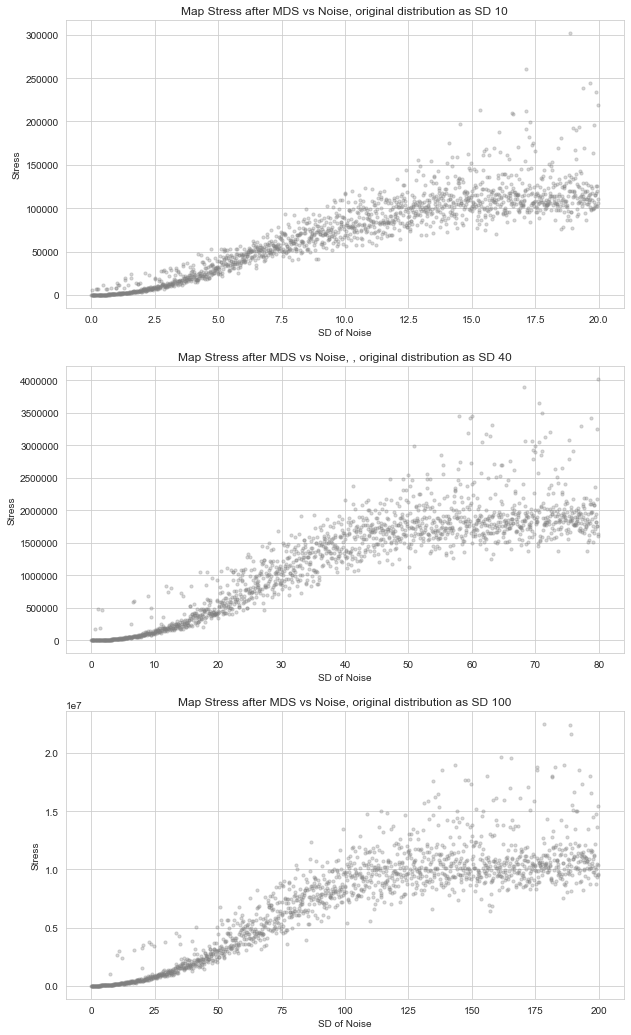

In [55]:
# plot stress vs noise 
plt.figure(figsize=(10,18))

plt.subplot(311)
plt.scatter(np.arange(0,20,0.0125),stresses,s=10,alpha=0.3, color='gray')
plt.title('Map Stress after MDS vs Noise, original distribution as SD 10')  
plt.xlabel('SD of Noise')  
plt.ylabel('Stress') 

plt.subplot(312)
plt.scatter(np.arange(0,80,0.05),stresses2,s=10,alpha=0.3, color='gray')
plt.title('Map Stress after MDS vs Noise, , original distribution as SD 40')  
plt.xlabel('SD of Noise')  
plt.ylabel('Stress') 

plt.subplot(313)
plt.scatter(np.arange(0,200,0.125),stresses3,s=10,alpha=0.3, color='gray')
plt.title('Map Stress after MDS vs Noise, original distribution as SD 100')  
plt.xlabel('SD of Noise')  
plt.ylabel('Stress') 

plt.show();

It seems that map stress flattens after SD of the added noise reaches the SD of underlying data

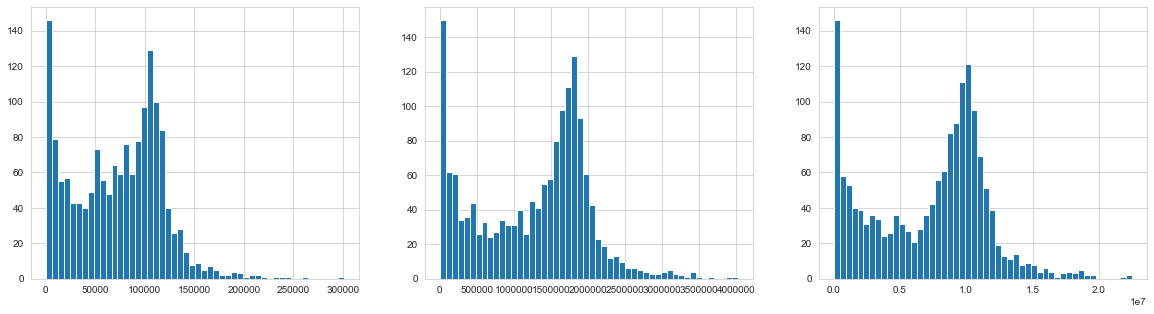

In [50]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(stresses,bins=50);

plt.subplot(132)
plt.hist(stresses2,bins=50);

plt.subplot(133)
plt.hist(stresses3,bins=50);